# Installing libraries

In [2]:
pip install pandas numpy matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


# Importing and Style

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Set plotting style for better visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# Data Loading and Setup


In [7]:

file_path = 'Unemployment_Rate_upto_11_2020.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please ensure the CSV is in the correct directory and named correctly.")
    exit()

# Display initial data info
print("\nInitial Data Info:")
print(df.info())

Dataset loaded successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
Non

# Data Cleaning and Preprocessing

In [8]:

df.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
              'Estimated Employed', 'Estimated Labour Participation Rate (%)',
              'Region Type', 'Longitude', 'Latitude']

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Drop rows with any missing values (for simplification in this analysis)
df.dropna(inplace=True)

# Convert key metrics to numeric types, coercing errors to NaN and dropping those rows
numeric_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed',
                'Estimated Labour Participation Rate (%)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True) # Drop any rows that became NaN due to conversion errors

# Extract Year and Month for seasonality analysis
df['Year'] = df['Date'].dt.year
df['Month_name'] = df['Date'].dt.strftime('%b')

print("\nData cleaned and preprocessed. Ready for analysis.")
print(f"Total records remaining: {len(df)}")


Data cleaned and preprocessed. Ready for analysis.
Total records remaining: 267


# Data Exploration and Visualization (Trends & Seasonality)

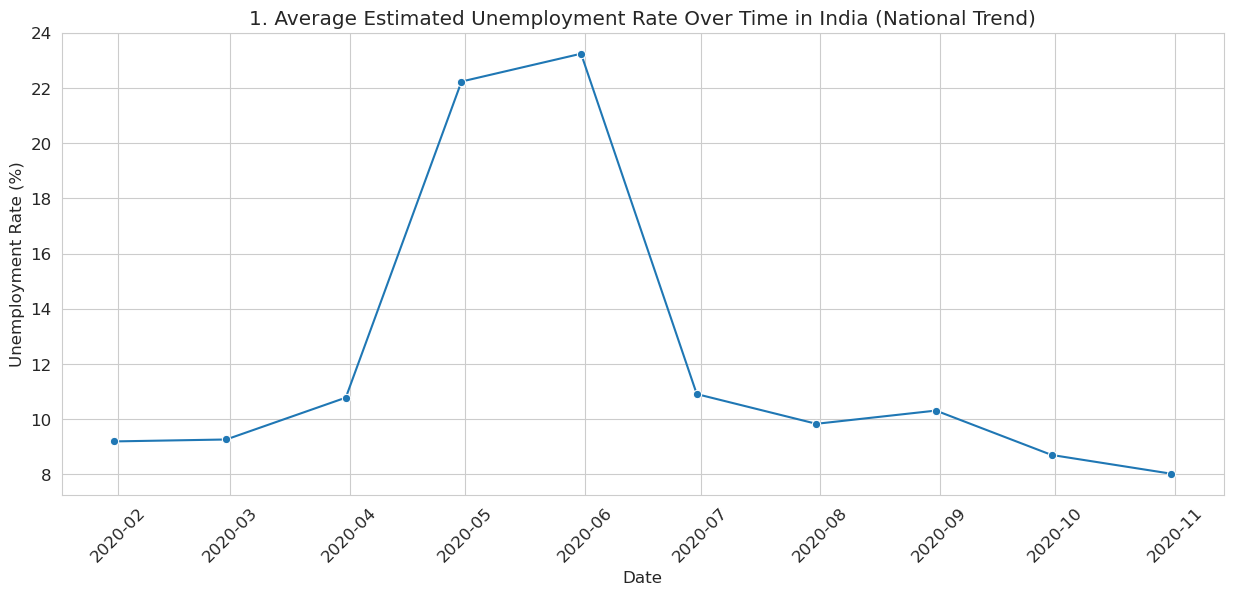

/tmp/ipykernel_3688/2391188429.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_unemployment.head(5).index, y=region_unemployment.head(5).values, palette='Reds_d')
/tmp/ipykernel_3688/2391188429.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_unemployment.tail(5).index, y=region_unemployment.tail(5).values, palette='Greens_d')


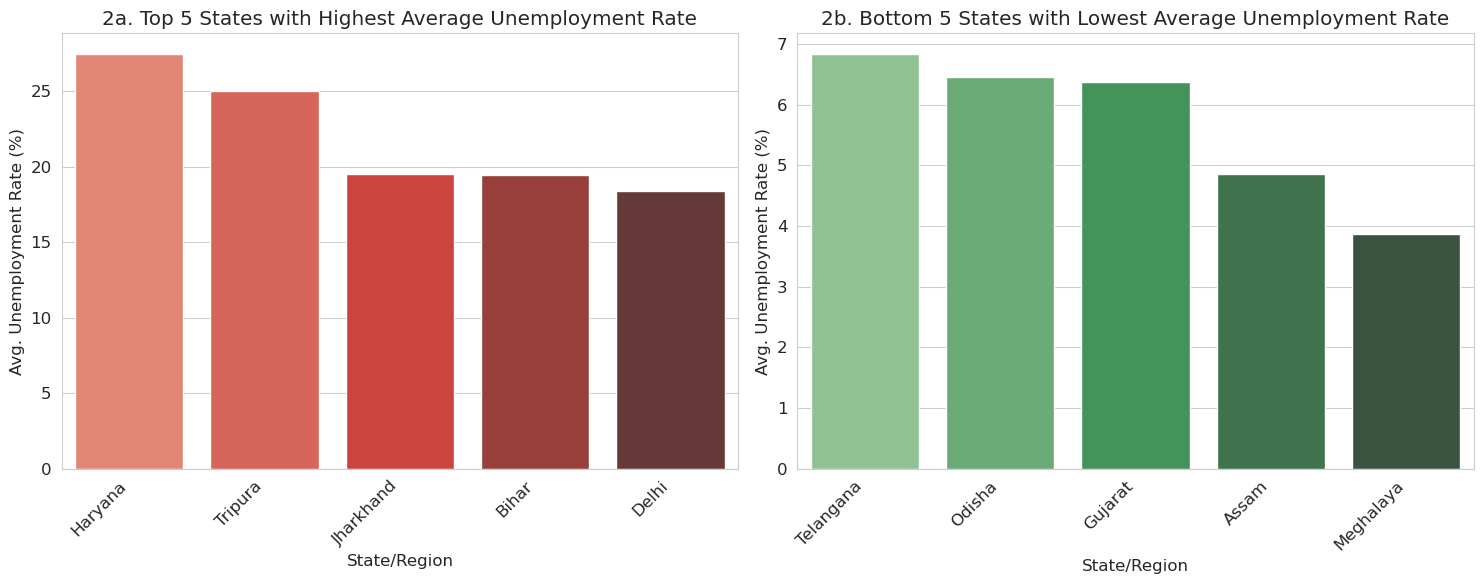

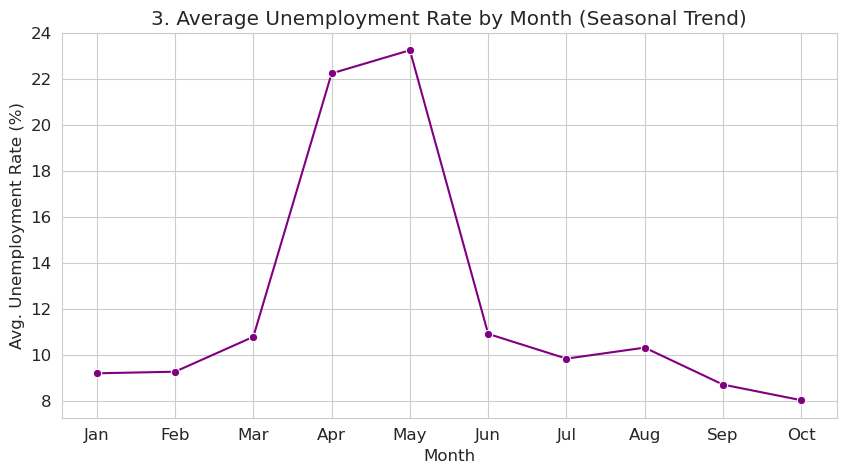

In [9]:

# 1. Overall Unemployment Trend Over Time
avg_unemployment = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=avg_unemployment, marker='o')
plt.title('1. Average Estimated Unemployment Rate Over Time in India (National Trend)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 2. Regional Unemployment Disparity (Top/Bottom 5 States)
region_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=region_unemployment.head(5).index, y=region_unemployment.head(5).values, palette='Reds_d')
plt.title('2a. Top 5 States with Highest Average Unemployment Rate')
plt.ylabel('Avg. Unemployment Rate (%)')
plt.xlabel('State/Region')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=region_unemployment.tail(5).index, y=region_unemployment.tail(5).values, palette='Greens_d')
plt.title('2b. Bottom 5 States with Lowest Average Unemployment Rate')
plt.ylabel('Avg. Unemployment Rate (%)')
plt.xlabel('State/Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Seasonal Trends (By Month)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_unemployment = df.groupby('Month_name')['Estimated Unemployment Rate (%)'].mean().reindex(month_order)

plt.figure(figsize=(10, 5))
sns.lineplot(x=seasonal_unemployment.index, y=seasonal_unemployment.values, marker='o', color='purple')
plt.title('3. Average Unemployment Rate by Month (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Avg. Unemployment Rate (%)')
plt.show()



# Investigate the Impact of Covid-19 


Average Unemployment Rate (Pre-Lockdown): 9.23%
Average Unemployment Rate (Peak Lockdown - Apr 2020): nan%
Increase in Unemployment during peak lockdown: nan percentage points.


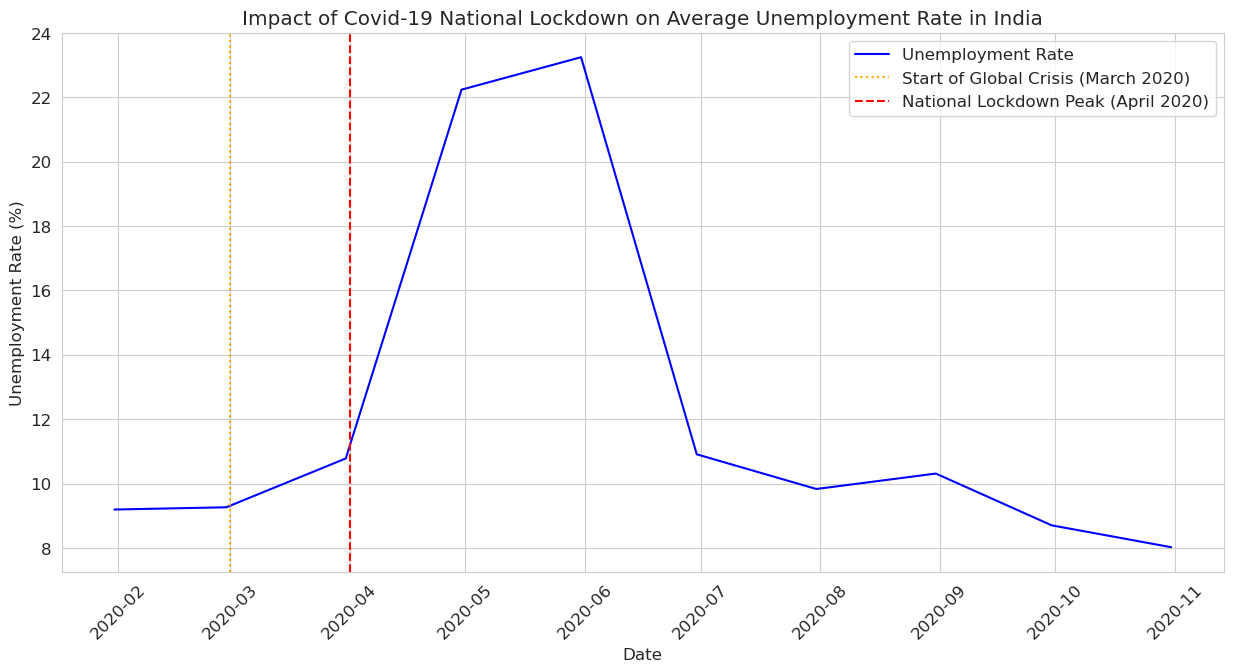

In [10]:
# Identify the pre-lockdown, lockdown, and recovery periods
pre_lockdown_end = pd.to_datetime('2020-03-01')
lockdown_peak_date = pd.to_datetime('2020-04-01')

# Calculate pre- and post-lockdown averages for a quantitative comparison
pre_lockdown_avg = df[df['Date'] < pre_lockdown_end]['Estimated Unemployment Rate (%)'].mean()
post_lockdown_peak_avg = df[df['Date'] == lockdown_peak_date]['Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment Rate (Pre-Lockdown): {pre_lockdown_avg:.2f}%")
print(f"Average Unemployment Rate (Peak Lockdown - Apr 2020): {post_lockdown_peak_avg:.2f}%")
print(f"Increase in Unemployment during peak lockdown: {post_lockdown_peak_avg - pre_lockdown_avg:.2f} percentage points.")


# Visualize the Covid-19 impact with annotation
plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=avg_unemployment, color='blue', label='Unemployment Rate')

# Highlight the lockdown period
plt.axvline(pre_lockdown_end, color='orange', linestyle=':', label='Start of Global Crisis (March 2020)')
plt.axvline(lockdown_peak_date, color='red', linestyle='--', label='National Lockdown Peak (April 2020)')
plt.annotate(f'Peak: {post_lockdown_peak_avg:.2f}%',
             xy=(lockdown_peak_date, post_lockdown_peak_avg),
             xytext=(pd.to_datetime('2020-08-01'), 20),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='red')

plt.title('Impact of Covid-19 National Lockdown on Average Unemployment Rate in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()